In [1]:
from keras.models import load_model
import numpy as np
import pandas as pd 
from keras.preprocessing import image
from keras.applications.xception import preprocess_input
from keras.preprocessing.image import ImageDataGenerator
import glob
import os
import random
import tqdm

Using TensorFlow backend.


In [2]:

IMG_SIZE = 299
img_shape = (IMG_SIZE, IMG_SIZE, 3)

# train_data_dir = '/home/ubuntu/.jupyter/indoor_data/train' 
test_data_dir = '/home/ubuntu/.jupyter/indoor_data/test'


In [3]:
test_img_dir = glob.glob('/home/ubuntu/.jupyter/indoor_data/test/class*/frame*.jpg')
print (len(test_img_dir))

test_img = []
# randomly pick 10 images from each class
class_dir = glob.glob('/home/ubuntu/.jupyter/indoor_data/test/class*/')
for i in range(len(class_dir)):
    img_in_class = glob.glob(os.path.join(class_dir[i], 'frame*.jpg'))
    test_img.append(random.sample(img_in_class, 10))

test_img_dir = [i for sub in test_img for i in sub] 
print(len(test_img_dir))

2984
760


In [4]:
# create corresponding one hot encoded label vector

label_list = []
for i in range(len(test_img_dir)):
    label = int(test_img_dir[i].split('/')[-2][-2:])
    label_list.append(label)

label_vec = pd.get_dummies(label_list)
label_vec.iloc[0][label_vec.iloc[0] == 1]


53    1
Name: 0, dtype: uint8

(760, 299, 299, 3)

In [5]:
# load image array from image directory

test_img_list = []

for i in range(len(test_img_dir)):
    img_path = test_img_dir[i]
    # loads RGB image as PIL.Image.Image type
    img = image.load_img(img_path, target_size = (IMG_SIZE, IMG_SIZE))
    # convert PIL.Image.Image type to 3D tensor with shape (224, 224, 3)
    x = image.img_to_array(img)

    test_img_list.append(x)

test_img_array = np.array(test_img_list)
test_img_array.shape

(760, 299, 299, 3)

In [6]:

test_datagen = ImageDataGenerator(preprocessing_function = preprocess_input)

test_generator = test_datagen.flow(
    test_img_array,
    label_vec,
#     target_size = (IMG_SIZE, IMG_SIZE),
    batch_size = 1,
    shuffle = False)


In [7]:
model = load_model('/home/ubuntu/.jupyter/indoor_models/2018-12-19_fulldata_gps_xception_model_0.01_midway.h5')
 
pred = model.predict_generator(test_generator, steps = test_generator.n)


In [8]:
pred_label = np.argmax(pred, axis = 1)

for i in zip(pred_label, [(i - 1) for i in label_list]):
    print(i)


(52, 52)
(52, 52)
(52, 52)
(52, 52)
(52, 52)
(52, 52)
(51, 52)
(52, 52)
(52, 52)
(52, 52)
(44, 44)
(44, 44)
(44, 44)
(44, 44)
(43, 44)
(44, 44)
(44, 44)
(44, 44)
(43, 44)
(43, 44)
(12, 0)
(12, 0)
(12, 0)
(12, 0)
(12, 0)
(12, 0)
(11, 0)
(29, 0)
(12, 0)
(12, 0)
(8, 8)
(8, 8)
(8, 8)
(8, 8)
(8, 8)
(63, 8)
(8, 8)
(8, 8)
(8, 8)
(8, 8)
(46, 46)
(46, 46)
(46, 46)
(46, 46)
(46, 46)
(46, 46)
(46, 46)
(46, 46)
(46, 46)
(46, 46)
(2, 2)
(2, 2)
(2, 2)
(2, 2)
(2, 2)
(2, 2)
(2, 2)
(2, 2)
(2, 2)
(2, 2)
(10, 10)
(10, 10)
(22, 10)
(10, 10)
(10, 10)
(10, 10)
(10, 10)
(10, 10)
(1, 10)
(10, 10)
(45, 45)
(45, 45)
(45, 45)
(45, 45)
(45, 45)
(45, 45)
(45, 45)
(45, 45)
(45, 45)
(45, 45)
(34, 34)
(34, 34)
(34, 34)
(34, 34)
(34, 34)
(34, 34)
(34, 34)
(34, 34)
(34, 34)
(34, 34)
(6, 6)
(6, 6)
(6, 6)
(64, 6)
(20, 6)
(6, 6)
(6, 6)
(6, 6)
(6, 6)
(20, 6)
(39, 32)
(39, 32)
(39, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(39, 32)
(32, 32)
(39, 32)
(15, 18)
(29, 18)
(18, 18)
(18, 18)
(18, 18)
(29, 18)
(18, 18)
(29, 18)
(12, 

In [9]:
right = 0
wrong = 0
pred_label = np.argmax(pred, axis = 1)

for i in range(len(pred_label)):
    if pred_label[i] == label_list[i] - 1:
        right += 1
    else:
        wrong += 1
        
right/ len(pred_label), wrong/ len(pred_label)

(0.8631578947368421, 0.1368421052631579)

### test on all images from the testing data 

In [10]:

test_datagen = ImageDataGenerator(preprocessing_function = preprocess_input)

test_generator = test_datagen.flow_from_directory(
    test_data_dir,
    target_size = (IMG_SIZE, IMG_SIZE),
    batch_size = 1,
    shuffle = False)


Found 2984 images belonging to 76 classes.


In [11]:
# more dropout 
model = load_model('/home/ubuntu/.jupyter/indoor_models/2018-12-19_fulldata_gps_xception_model_0.01_midway.h5')
 
pred = model.predict_generator(test_generator, steps = len(test_generator.classes))


In [22]:
right = 0
wrong = 0
pred_label = np.argmax(pred, axis = 1)

for i in range(len(pred_label)):
    if pred_label[i] == test_generator.classes[i]:
        right += 1
    else:
        wrong += 1
        
right/ len(pred_label), wrong/ len(pred_label)

(0.864946380697051, 0.13505361930294907)

In [ ]:
print (np.min(pred_label), np.max(pred_label), np.min(test_generator.classes), np.max(test_generator.classes))

np.unique(test_generator.classes, return_counts = True)


In [30]:
from sklearn.metrics import classification_report
target_names = ['class_' + str(i) for i in np.arange(76)]

print(classification_report(test_generator.classes, pred_label, target_names = target_names))


             precision    recall  f1-score   support

    class_0       0.00      0.00      0.00        20
    class_1       0.97      1.00      0.99        35
    class_2       1.00      1.00      1.00        52
    class_3       1.00      0.96      0.98        28
    class_4       0.98      0.90      0.94        50
    class_5       0.89      0.85      0.87        40
    class_6       1.00      0.67      0.80        27
    class_7       1.00      0.28      0.43        36
    class_8       1.00      0.80      0.89        35
    class_9       0.94      1.00      0.97        33
   class_10       1.00      0.91      0.96        35
   class_11       0.79      0.96      0.87        24
   class_12       0.75      0.98      0.85        59
   class_13       1.00      1.00      1.00        68
   class_14       0.96      0.98      0.97        55
   class_15       0.89      1.00      0.94        42
   class_16       0.95      1.00      0.97        19
   class_17       1.00      0.72      0.84   

/home/ubuntu/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Confusion matrix, without normalization
[[ 0  0  0 ...  0  0  0]
 [ 0 35  0 ...  0  0  0]
 [ 0  0 52 ...  0  0  0]
 ...
 [ 0  0  0 ... 67  0  0]
 [ 0  0  0 ...  0 33  1]
 [ 0  0  0 ...  0  3 55]]


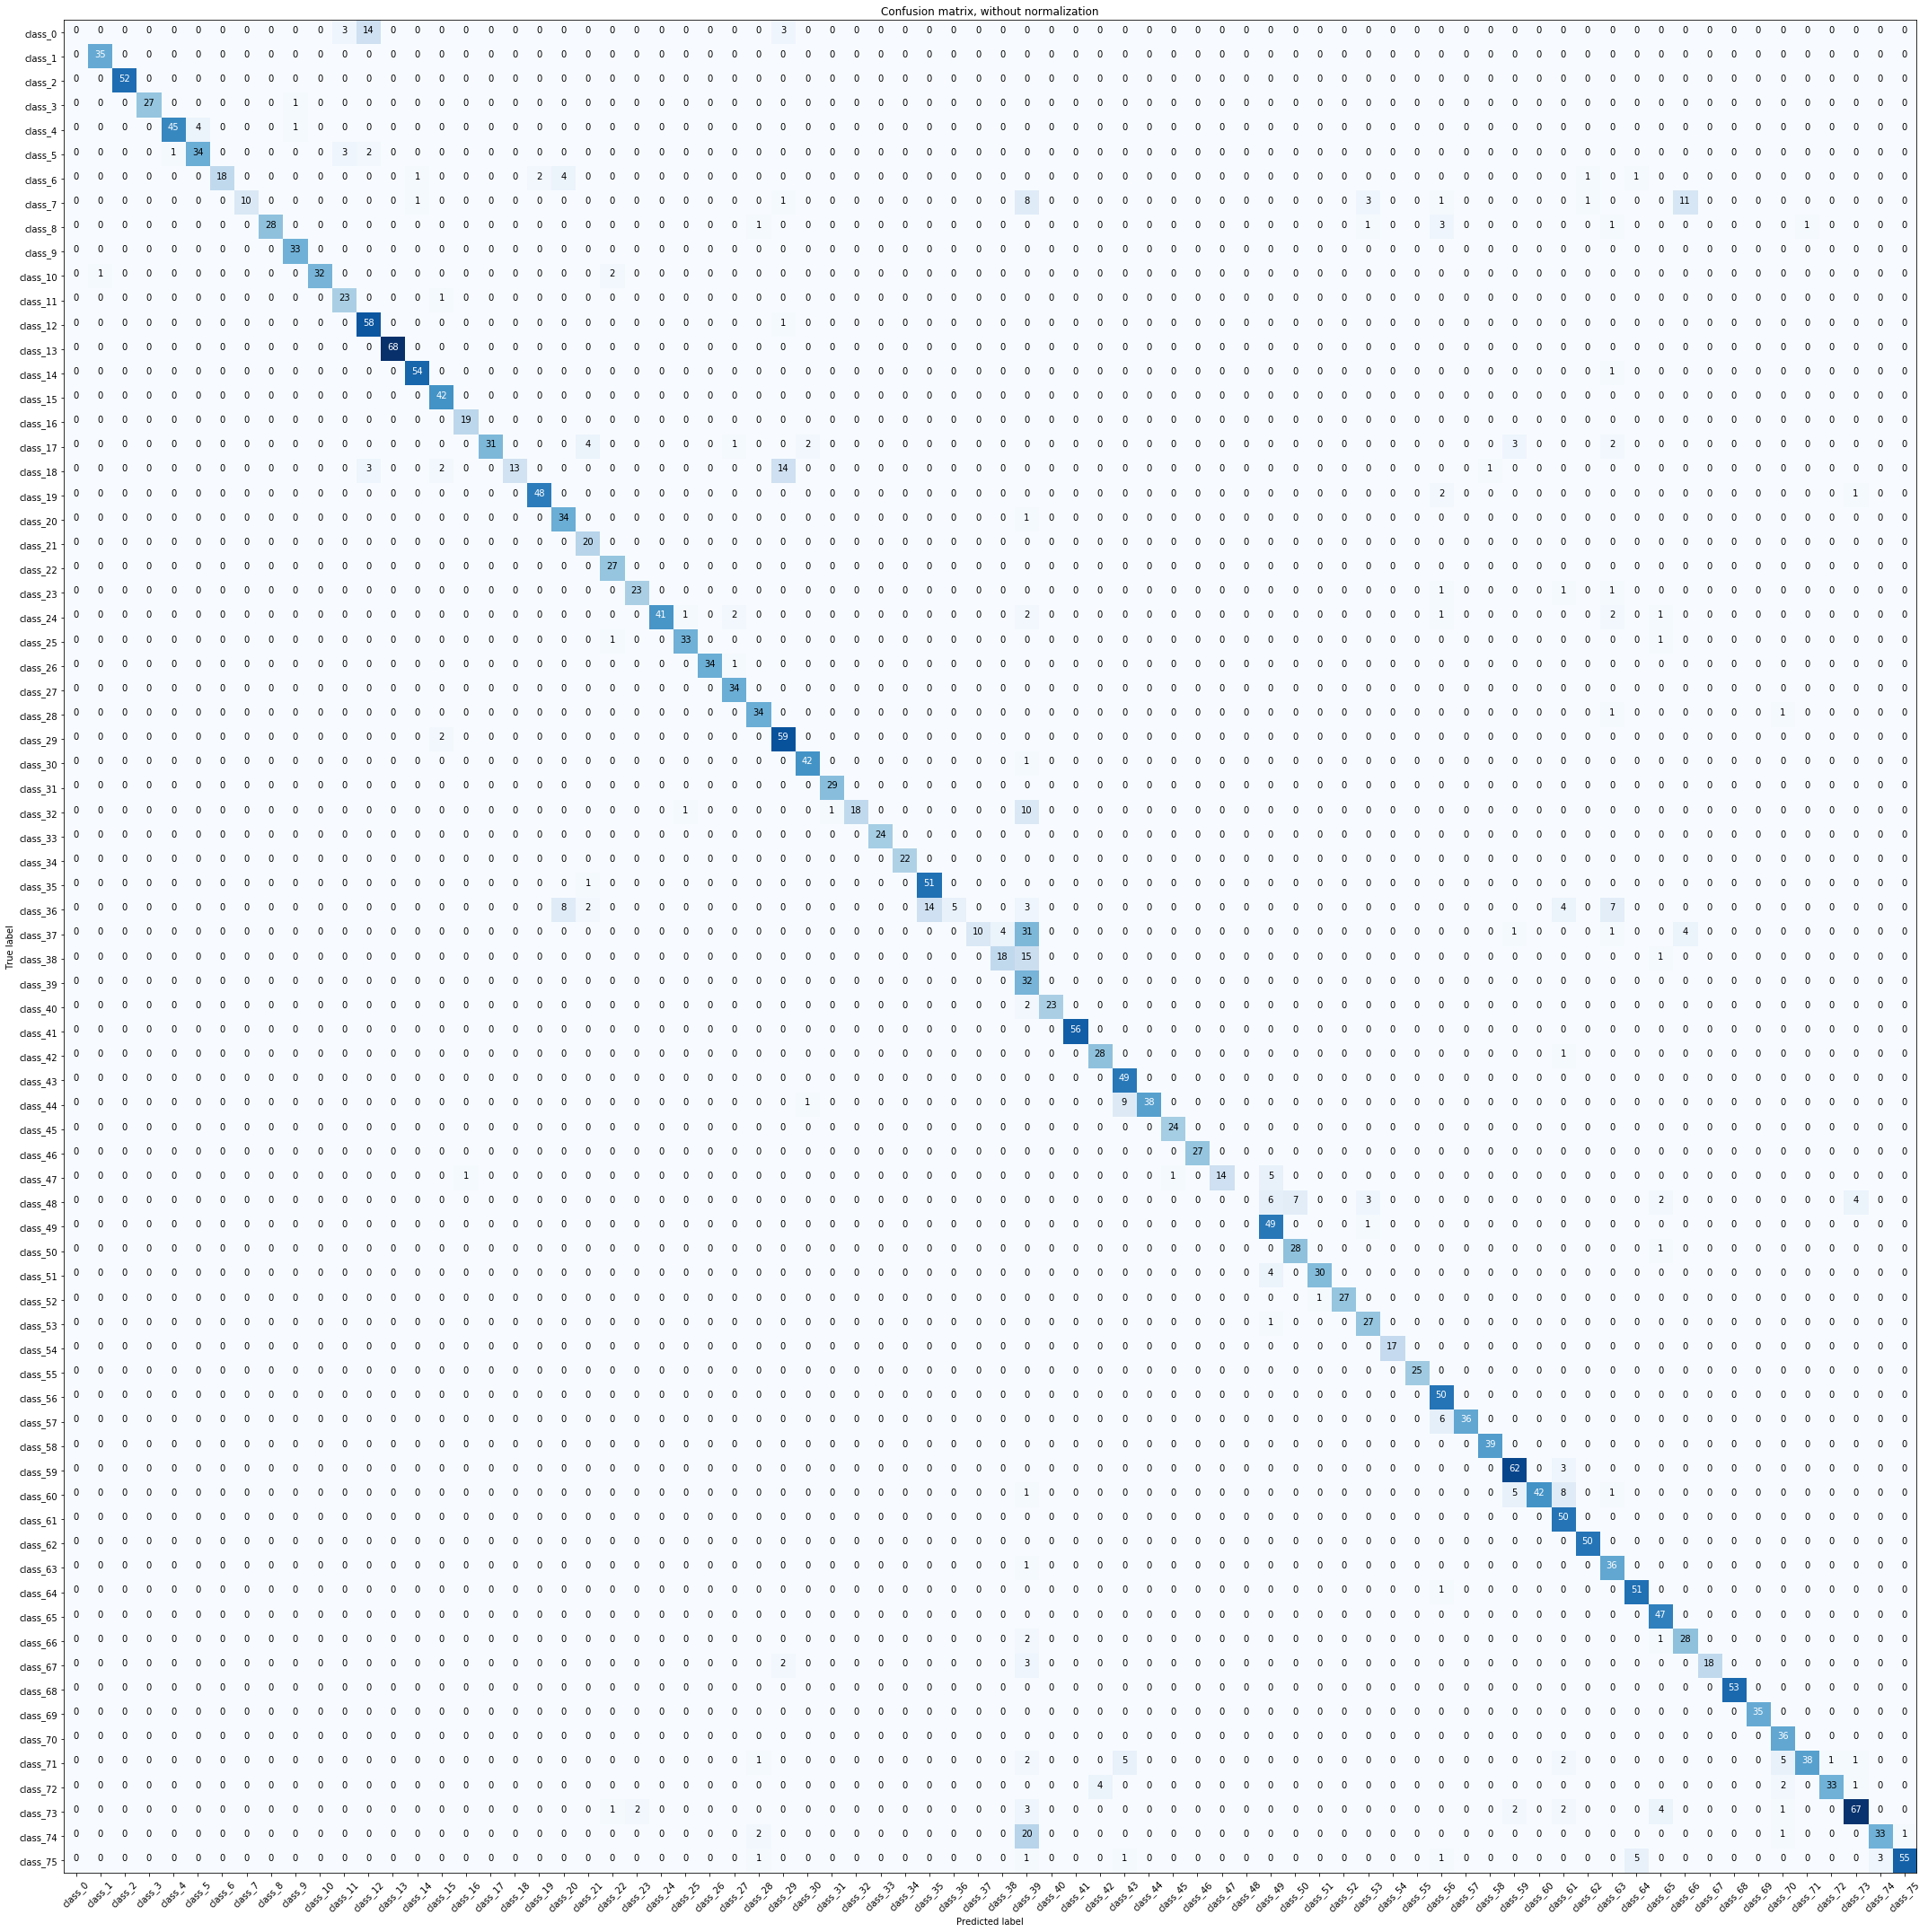

In [37]:
import itertools
import matplotlib.pyplot as plt
%matplotlib inline 

from sklearn.metrics import confusion_matrix

class_names = ['class_' + str(i) for i in np.arange(76)]



def plot_confusion_matrix(cm, classes, normalize=False, title='Confusion matrix', cmap=plt.cm.Blues):

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)
    
    plt.figure(figsize = (30, 30))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
#     plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()


# Compute confusion matrix
cnf_matrix = confusion_matrix(test_generator.classes, pred_label)
np.set_printoptions(precision=2)


plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Confusion matrix, without normalization')
